In [1]:
# coding=utf-8
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from datetime import datetime, timedelta
from matplotlib.font_manager import FontProperties
import joblib

In [3]:
dataFrame = pd.read_csv('./ENdata/reddit_1.csv')
doc_topic = np.load('./ENdata/topic14/doc_topic_1.npy')

model = joblib.load('./kmeansModel/EN14/batch1/14.model')
# 得出每个文档对应的分类
result = model.predict(doc_topic)
result

array([10,  6, 12, ...,  1,  1,  6])

In [4]:
dataFrame['time'][0][5:10]

'10-20'

{'10-07': array([ 9., 18., 25., 17., 12., 37.]), '10-08': array([34., 46., 62., 28., 32., 71.]), '10-09': array([ 47., 112.,  84.,  44.,  36., 115.]), '10-10': array([ 54., 102., 121.,  85.,  71.,  98.]), '10-11': array([30., 60., 74., 47., 37., 56.]), '10-12': array([ 54., 113.,  92.,  40.,  57., 107.]), '10-13': array([42., 73., 80., 25., 34., 89.]), '10-14': array([36., 71., 67., 18., 28., 70.]), '10-15': array([32., 87., 71., 35., 21., 71.]), '10-16': array([35., 69., 56., 43., 49., 70.]), '10-17': array([112., 244., 161., 146., 113., 165.]), '10-18': array([116., 291., 252., 244., 182., 215.]), '10-19': array([156., 196., 210., 126., 136., 213.]), '10-20': array([ 71., 149., 122.,  75.,  68., 132.])}


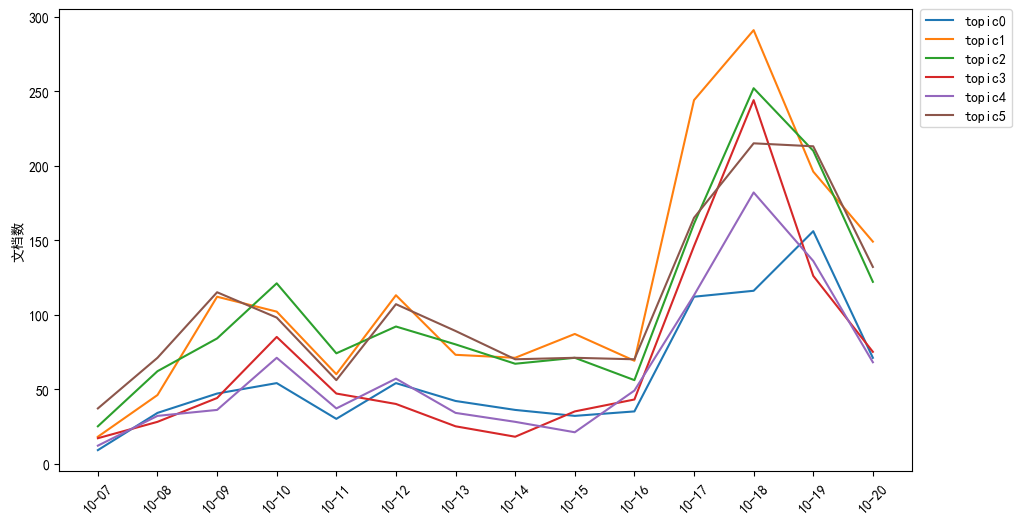

In [8]:
# 生成一个日期字符串列表，从"10月07日"开始到当前日期
dates = []
date = datetime.strptime("2023年10月07日", "%Y年%m月%d日")
date_count = {}
while True:
    dates.append(date.strftime("%m-%d"))
    date_count[date.strftime("%m-%d")] = np.zeros(6)
    date += timedelta(days=1)
    if date.month == 10 and date.day == 21:
        break

for i in range(len(result)):
    cur_date = dataFrame['time'][i][5:10]
    if cur_date not in dates:
        continue
    num = date_count[cur_date][result[i]]
    date_count[cur_date][result[i]] = num + 1
print(date_count)

x = dates
y = []
for date in dates:
    y.append(date_count[date])
y = np.column_stack(y)

plt.figure(figsize=(11,6))
for i in range(6):
    plt.plot(x, y[i], '-', label=f'topic{i}')
# 设置支持中文的字体，例如：SimHei
font = FontProperties(fname=None, size=14)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.xticks(rotation=45)
plt.ylabel('文档数')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)
plt.savefig('./ENdata/第一部分趋势图.png')
plt.show()